# Proyecto final - SQL
---

### 1. Descripción del proyecto
---
El coronavirus tomó al mundo entero por sorpresa, cambiando la rutina diaria de todos y todas. Los habitantes de las ciudades ya no pasaban su tiempo libre fuera, yendo a cafés y centros comerciales; sino que más gente se quedaba en casa, leyendo libros. Eso atrajo la atención de las startups (empresas emergentes) que se apresuraron a desarrollar nuevas aplicaciones para los amantes de los libros.

Una base de datos de uno de los servicios que compiten en este mercado, contiene datos sobre libros, editoriales, autores y calificaciones de clientes y reseñas de libros. Esta información se utilizará para generar una propuesta de valor para un nuevo producto.

### 2. Objetivos
---
- Encontrar el número de libros publicados después del 1 de enero de 2000.
- Encontrar el número de reseñas de usuarios y la calificación promedio para cada libro.
- Identificar la editorial que ha publicado el mayor número de libros con más de 50 páginas (esto te ayudará a excluir folletos y publicaciones similares de tu análisis).
- Identificar al autor que tiene la más alta calificación promedio del libro: mira solo los libros con al menos 50 calificaciones.
- Encontrar el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.

### 3. Descripción de los datos
---
**`books`**

Contiene datos sobre libros:

- `book_id`: identificación del libro
- `author_id`: identificación del autor o autora
- `title`: título
- `num_pages`: número de páginas
- `publication_date`: fecha de la publicación
- `publisher_id`: identificación de la editorial

**`authors`**

Contiene datos sobre autores:

- `author_id`: identificación del autor o autora
- `author`: el autor o la autora

**`publishers`**

Contiene datos sobre editoriales:

- `publisher_id`: identificación de la editorial
- `publisher`: la editorial

**`ratings`**

Contiene datos sobre las calificaciones de usuarios:

- `rating_id`: identificación de la calificación
- `book_id`: identificación del libro
- `username`: el nombre del usuario que revisó el libro
- `rating`: calificación

**`reviews`**

Contiene datos sobre las reseñas de los y las clientes:

- `review_id`: identificación de la reseña
- `book_id`: identificación del libro
- `username`: el nombre del usuario que revisó el libro
- `text`: el texto de la reseña

### 4. Diagrama de datos
---
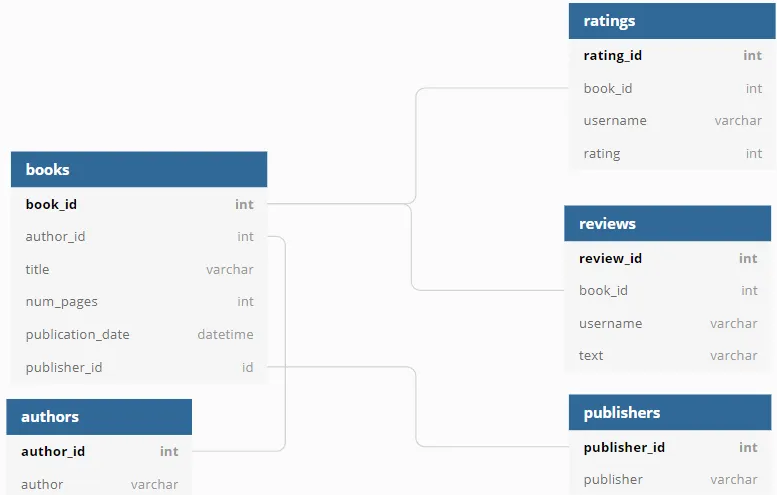


### 6. Conexión a la base de datos
---

In [1]:
# importar librerías
import pandas as pd
from sqlalchemy import create_engine
import psycopg2

In [2]:

db_config = {'user': 'practicum_student',         # nombre de usuario
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # contraseña
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # puerto de conexión
             'db': 'data-analyst-final-project-db'}          # nombre de la base de datos

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

### 7. Exploración de datos
---

In [3]:
#Visualización de tablas 
tables = ['books', 'authors', 'publishers', 'ratings', 'reviews']

for table in tables:
    query = 'SELECT * FROM ' + table + ' LIMIT 5'

    display(pd.io.sql.read_sql(query, con = engine))

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [4]:
# Encontrar el número de libros publicados después del 1 de enero de 2000.
books_count = """
SELECT COUNT(book_id)

FROM books

WHERE publication_date > '2000-01-01';

"""

pd.io.sql.read_sql(books_count, con = engine)

,count
0,819


Después de la fecha 2000-01-01 se han publicado 819 libros en total.

In [5]:
reviews_count = """
SELECT
    books.title,
    (SELECT COUNT(*) FROM reviews WHERE reviews.book_id = books.book_id) AS num_reviews,
    (SELECT AVG(rating) FROM ratings WHERE ratings.book_id = books.book_id) AS avg_rating
FROM books
ORDER BY 
    (SELECT COUNT(*) FROM reviews WHERE reviews.book_id = books.book_id) DESC,
    avg_rating ASC;
"""
pd.io.sql.read_sql(reviews_count, con = engine)

,title,num_reviews,avg_rating
0,Twilight (Twilight #1),7,3.662500
1,Eat Pray Love,6,3.395833
2,The Giver (The Giver #1),6,3.750000
3,The Road,6,3.772727
4,The Alchemist,6,3.789474
...,...,...,...
995,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667
996,Leonardo's Notebooks,0,4.000000
997,Disney's Beauty and the Beast (A Little Golden...,0,4.000000
998,Essential Tales and Poems,0,4.000000


Observaciones generales:

Rango de reseñas: El número de reseñas varía significativamente entre los libros, desde 7 hasta 0. Esto sugiere que algunos libros son más populares y han recibido más atención que otros.
Calificaciones: Las calificaciones promedio se encuentran en un rango relativamente estrecho, lo que indica que en general los libros tienen una valoración positiva. 
Libros sin reseñas: Un número considerable de libros en la tabla no tienen reseñas. Esto podría deberse a varias razones, como que son libros más recientes, menos conocidos o que simplemente no han sido reseñados por los usuarios.

In [6]:
#Identificar la editorial que ha publicado el mayor número de libros con más de 50 páginas
publisher= """
SELECT publisher,
       (SELECT COUNT(*) FROM books WHERE books.publisher_id = publishers.publisher_id) AS total_books
FROM publishers
WHERE publisher_id = (
  SELECT publisher_id
  FROM books
  WHERE num_pages > 50
  GROUP BY publisher_id
  ORDER BY COUNT(*) DESC
  LIMIT 1
);
"""

pd.io.sql.read_sql(publisher, con = engine)

,publisher,total_books
0,Penguin Books,42


La editorial 'Penguin Books' es la que más libros ha publicado con más de 50 páginas, siendo 42 libros en total.

In [15]:
#Identificar al autor que tiene la más alta calificación promedio del libro, solo los libros con al menos 50 calificaciones.
authors_avg_rating = """
SELECT 
    authors.author as author_name,
    AVG(ratings.rating) as avg_rating
FROM authors
INNER JOIN books on books.author_id = authors.author_id
INNER JOIN ratings on ratings.book_id = books.book_id
GROUP BY author_name
HAVING COUNT(ratings.rating) > 50
ORDER BY avg_rating DESC
LIMIT 1;
"""

pd.io.sql.read_sql(authors_avg_rating, con = engine)

,author_name,avg_rating
0,J.K. Rowling/Mary GrandPré,4.288462


Tomando en cuenta los libros con al menos 50 calificaciones, el autor con la calificación promedio más alta es 'J.K. Rowling/Mary GrandPré'

In [20]:
# Encuentrar el número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros
avg_reviews_per_user= """
SELECT AVG(reviews_cnt) AS avg_reviews_per_user
FROM (
  SELECT username, COUNT(*) AS reviews_cnt
  FROM reviews
  GROUP BY username
) AS reviews_per_user
WHERE username IN 
(
  SELECT username
  FROM ratings
  GROUP BY username
  HAVING COUNT(*) > 50
);
"""

pd.io.sql.read_sql(avg_reviews_per_user, con = engine)

,avg_reviews_per_user
0,24.333333


El número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros es de 24.33

### 8. Conclusiones
---
- Crecimiento Post-2000: El mercado de libros ha experimentado un crecimiento significativo desde el año 2000, con la publicación de 819 nuevos títulos. Esto indica una demanda constante y un mercado en expansión.
- Desigualdad en Reseñas: Existe una gran disparidad en el número de reseñas por libro, lo que sugiere que la popularidad de los libros varía considerablemente. Los libros más populares tienden a recibir una mayor atención y comentarios de los lectores.
- Calificaciones Positivas: Las calificaciones promedio de los libros son generalmente altas, lo que indica una satisfacción general de los lectores con los títulos disponibles en el mercado.
- Libros Sin Reseñas: La presencia de libros sin reseñas podría ser una oportunidad para destacar nuevos títulos o libros menos conocidos que podrían beneficiarse de una mayor promoción.

Los hallazgos obtenidos de la base de datos revelan oportunidades significativas para crear un nuevo producto que satisfaga las necesidades de los lectores, autores y editores. Al aprovechar las tendencias del mercado y las preferencias de los usuarios, es posible desarrollar una plataforma que se destaque en un mercado cada vez más competitivo